In [1]:
import pandas as pd
import utils as my

## Dataset

In [2]:
dataset_path = "./WA_Fn-UseC_-HR-Employee-Attrition.csv"
target_name = "Attrition"
train_size = 0.75

dataset = pd.read_csv(dataset_path)
print(">> Data shape:", dataset.shape)
dataset.head(10)

>> Data shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Missing values and duplicates

In [4]:
print(">> Missing values:", dataset.isnull().any().sum())
print(">> Duplicate values:", dataset.duplicated().sum())

# dataset.drop_duplicates(inplace=True, keep='first', ignore_index=True)
# print(">> Duplicate values:", dataset.duplicated().sum())

>> Missing values: 0
>> Duplicate values: 0


### Unique values

In [5]:
n_data = dataset.shape[0]

print(">> n_unique = 1:       ", len(my.get_nunique_features(dataset, value=1)))
print(">> n_unique = n_data:  ", len(my.get_nunique_features(dataset, value=n_data)))
print(">> n_unique > n_data-5:", len(my.get_nunique_features(dataset, value=n_data-5, kind='greater_than')))
print(">> n_unique < 3        ", len(my.get_nunique_features(dataset, value=2, kind='less_than')))

>> n_unique = 1:        3
>> n_unique = n_data:   1
>> n_unique > n_data-5: 1
>> n_unique < 3         3


## Data types

### Ignore features

In [6]:
dataset = pd.read_csv(dataset_path)
print(">> Initial:\n", dataset.dtypes.value_counts())

ignore_features = ['StandardHours', 'EmployeeCount', 'Over18', 'EmployeeNumber']
ignore_features += my.get_nunique_features(dataset, value=1)
ignore_features += my.get_nunique_features(dataset, value=dataset.shape[0])
ignore_features = list(set(ignore_features))

if target_name in ignore_features:
    ignore_features.remove(target_name)

print(ignore_features)
dataset.drop(ignore_features, axis=1, inplace=True)
print(">> After dropping features:\n", dataset.dtypes.value_counts())

>> Initial:
 int64     26
object     9
dtype: int64
['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber']
>> After dropping features:
 int64     23
object     8
dtype: int64


### Numerical features

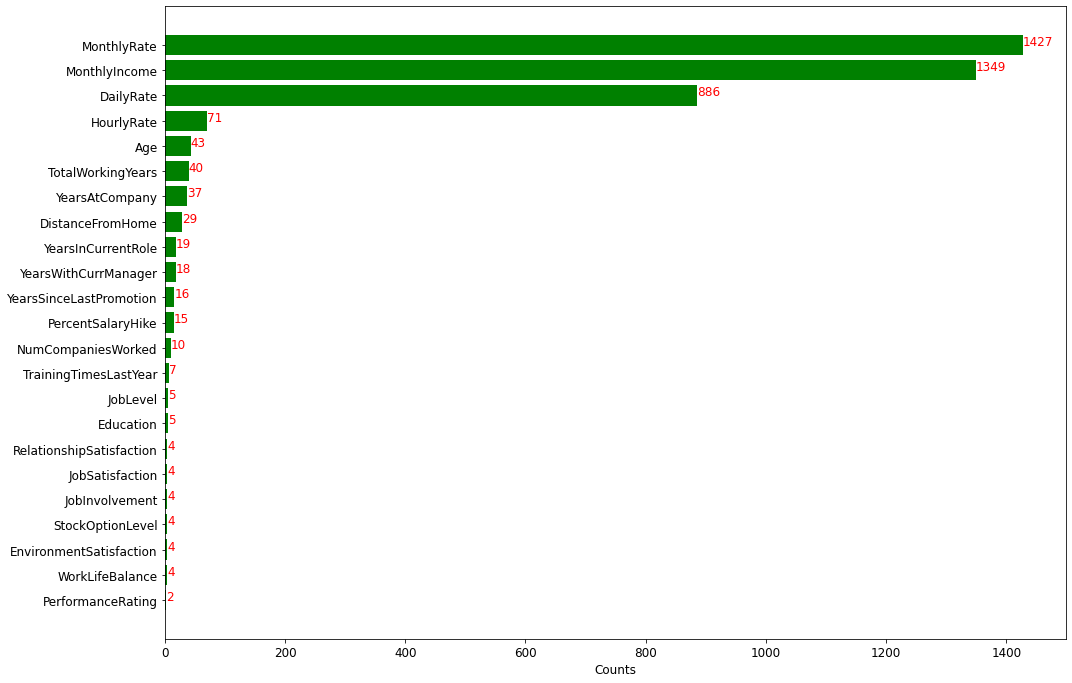

In [7]:
numerical_features = dataset.select_dtypes(include='number').columns.values
my.show_counts(dataset, numerical_features)

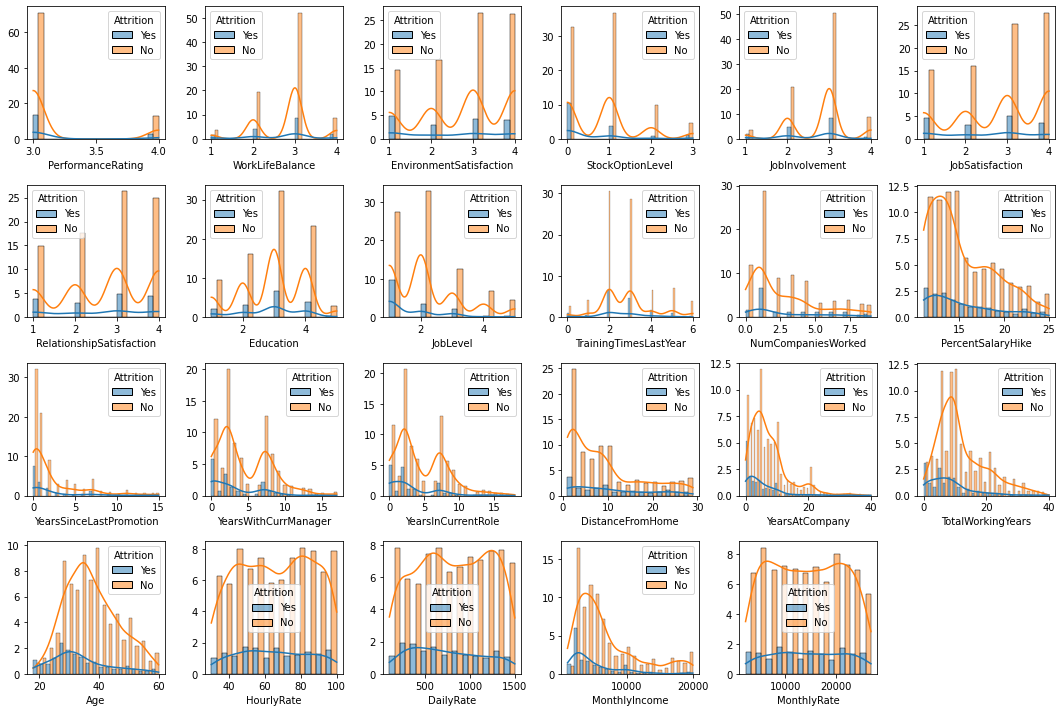

In [8]:
feature_names = my.get_nunique_features(dataset[numerical_features], value=1, kind="greater_than")
my.show_histogram(dataset, feature_names, target=target_name, kde=True)

### Categorical features

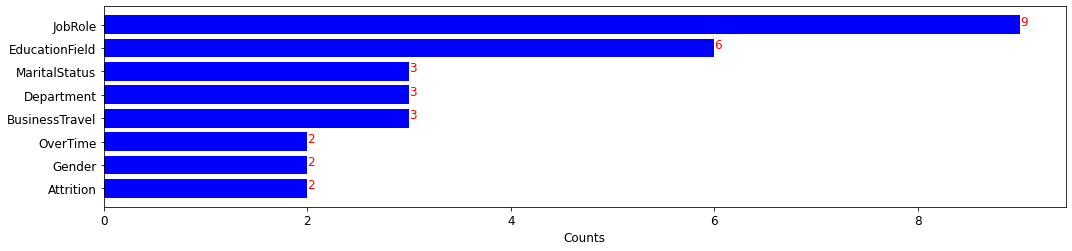

In [9]:
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
my.show_counts(dataset, categorical_features, color='blue')

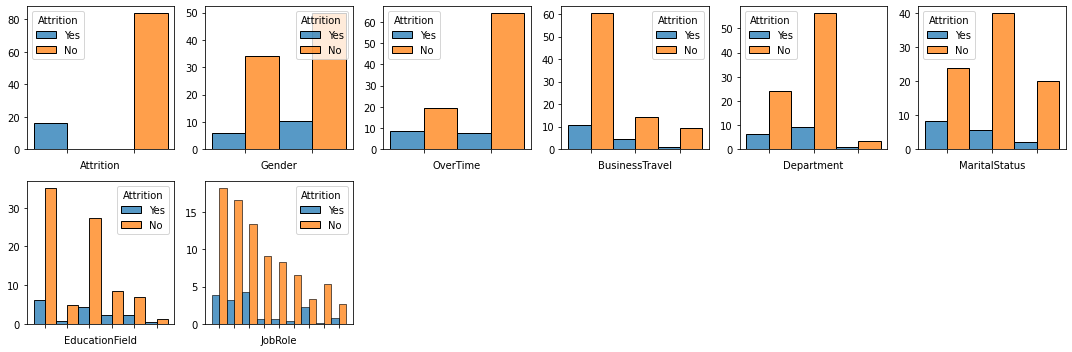

In [10]:
feature_names = my.get_nunique_features(dataset[categorical_features], value=1, kind="greater_than")
my.show_histogram(dataset, feature_names, target=target_name, xlabels=False)

### Ordinal features

In [11]:
ordinal_features = None
# show_histogram(dataset, ordinal_features, target=target_name)

### High cardinality features

In [12]:
high_cardianlity_features = None
# show_histogram(dataset, high_cardianlity_features, target=target_name)

### Group features

In [13]:
group_features = None
# show_histogram(dataset, group_features, target=target_name)

### Bin number features

In [14]:
group_features = None
# show_histogram(dataset, group_features, target=target_name)

## Correlations between features

### Numerical Features - Peason's R

In [15]:
numerical_features = dataset.select_dtypes(include='number').columns.values
high_corr_features, (names, values) = my.get_high_corr_numerical(
                                        dataset, numerical_features, threshold=0.8)
high_corr_features

Pearson's R = 0.9503 - ['JobLevel' 'MonthlyIncome']


['JobLevel']

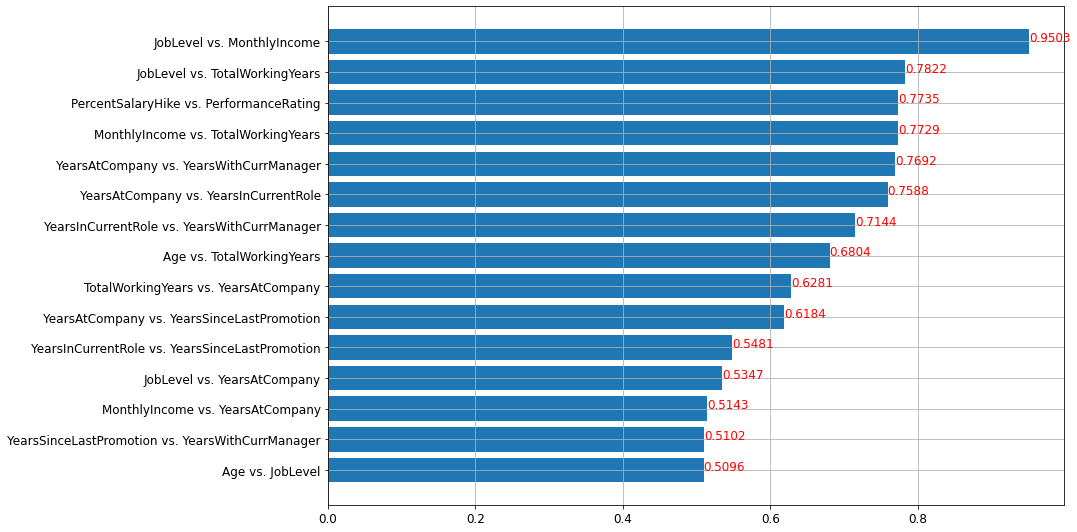

In [16]:
my.show_correlations(names, values, threshold=0.5)

### Categorical features - Cramer's V

In [17]:
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.values
dataset_encoded = pd.get_dummies(dataset[categorical_features])
categorical_features = dataset_encoded.columns.values

high_corr_features, (names, values) = my.get_high_corr_categorical(
                                            dataset_encoded, categorical_features, threshold=0.8)

Cramer's V = 0.9972 - ['Gender_Female' 'Gender_Male']
Cramer's V = 0.9967 - ['OverTime_No' 'OverTime_Yes']
Cramer's V = 0.9950 - ['Attrition_No' 'Attrition_Yes']
Cramer's V = 0.8195 - ['Department_Research & Development' 'Department_Sales']
Cramer's V = 0.8026 - ['Department_Human Resources' 'JobRole_Human Resources']


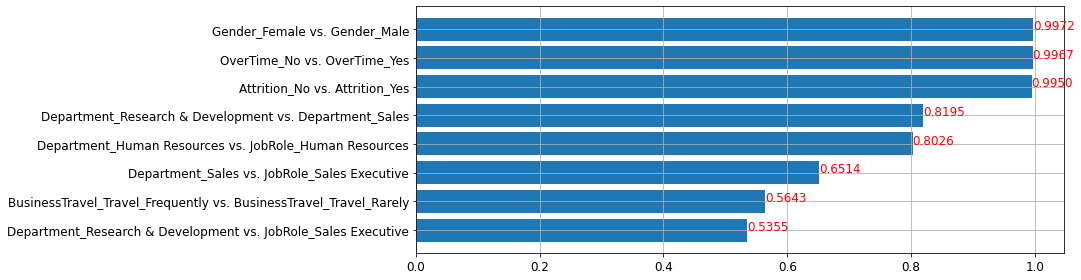

In [18]:
my.show_correlations(names, values, threshold=0.5)